In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('CodingCSV.csv')

# Display the first few rows to check the data
print(df.head())


   Year Industry_aggregation_NZSIOC Industry_code_NZSIOC Industry_name_NZSIOC  \
0  2023                     Level 1                99999       All industries   
1  2023                     Level 1                99999       All industries   
2  2023                     Level 1                99999       All industries   
3  2023                     Level 1                99999       All industries   
4  2023                     Level 1                99999       All industries   

                Units Variable_code  \
0  Dollars (millions)           H01   
1  Dollars (millions)           H04   
2  Dollars (millions)           H05   
3  Dollars (millions)           H07   
4  Dollars (millions)           H08   

                                     Variable_name      Variable_category  \
0                                     Total income  Financial performance   
1  Sales, government funding, grants and subsidies  Financial performance   
2                Interest, dividends and donati

In [3]:
# Print the first 10 rows
print(df.head(10))


   Year Industry_aggregation_NZSIOC Industry_code_NZSIOC Industry_name_NZSIOC  \
0  2023                     Level 1                99999       All industries   
1  2023                     Level 1                99999       All industries   
2  2023                     Level 1                99999       All industries   
3  2023                     Level 1                99999       All industries   
4  2023                     Level 1                99999       All industries   
5  2023                     Level 1                99999       All industries   
6  2023                     Level 1                99999       All industries   
7  2023                     Level 1                99999       All industries   
8  2023                     Level 1                99999       All industries   
9  2023                     Level 1                99999       All industries   

                Units Variable_code  \
0  Dollars (millions)           H01   
1  Dollars (millions)         

In [4]:
# Print the column names
print(df.columns)


Index(['Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC',
       'Industry_name_NZSIOC', 'Units', 'Variable_code', 'Variable_name',
       'Variable_category', 'Value', 'Industry_code_ANZSIC06'],
      dtype='object')


In [5]:
# Summary of the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50985 entries, 0 to 50984
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         50985 non-null  int64 
 1   Industry_aggregation_NZSIOC  50985 non-null  object
 2   Industry_code_NZSIOC         50985 non-null  object
 3   Industry_name_NZSIOC         50985 non-null  object
 4   Units                        50985 non-null  object
 5   Variable_code                50985 non-null  object
 6   Variable_name                50985 non-null  object
 7   Variable_category            50985 non-null  object
 8   Value                        50985 non-null  object
 9   Industry_code_ANZSIC06       50985 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB
None


In [6]:
# Descriptive statistics for numeric columns
print(df.describe())


               Year
count  50985.000000
mean    2018.000000
std        3.162309
min     2013.000000
25%     2015.000000
50%     2018.000000
75%     2021.000000
max     2023.000000


In [7]:
# Check for missing data
print(df.isnull().sum())

# Example: Fill missing values with a specific value (e.g., 0)
df.fillna(0, inplace=True)

# Alternatively, you can drop rows with missing values
df.dropna(inplace=True)


Year                           0
Industry_aggregation_NZSIOC    0
Industry_code_NZSIOC           0
Industry_name_NZSIOC           0
Units                          0
Variable_code                  0
Variable_name                  0
Variable_category              0
Value                          0
Industry_code_ANZSIC06         0
dtype: int64


In [8]:
# Sort by the 'Value' column in descending order
df_sorted = df.sort_values(by='Value', ascending=False)
print(df_sorted.head())


       Year Industry_aggregation_NZSIOC Industry_code_NZSIOC  \
40287  2015                     Level 4                KK112   
40219  2015                     Level 3                 KK11   
22078  2019                     Level 4                LL122   
31348  2017                     Level 4                LL122   
31347  2017                     Level 4                LL122   

                     Industry_name_NZSIOC               Units Variable_code  \
40287           Financial Asset Investing  Dollars (millions)           H26   
40219                             Finance  Dollars (millions)           H26   
22078  Non-Residential Property Operation  Dollars (millions)           H28   
31348  Non-Residential Property Operation  Dollars (millions)           H28   
31347  Non-Residential Property Operation  Dollars (millions)           H27   

                   Variable_name   Variable_category Value  \
40287      Fixed tangible assets  Financial position     S   
40219      Fixed

In [9]:
# Get the number of columns
print(f"Number of columns: {df.shape[1]}")


Number of columns: 10


In [10]:
# Check dataset indexing
print(df.index)


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            50975, 50976, 50977, 50978, 50979, 50980, 50981, 50982, 50983,
            50984],
           dtype='int64', length=50985)


In [11]:
# Get the number of rows
print(f"Number of observations: {df.shape[0]}")


Number of observations: 50985


In [15]:
# Convert the 'Value' column to numeric, setting errors='coerce' to handle non-numeric values
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Now apply the lambda function to create a new column 'Value_Category'
df['Value_Category'] = df['Value'].apply(lambda x: 'High' if x > 500000 else 'Low')

# Print first few rows to check the new column
print(df[['Value', 'Value_Category']].head())


      Value Value_Category
0  930995.0           High
1  821630.0           High
2   84354.0            Low
3   25010.0            Low
4  832964.0           High


In [16]:
# Find the number of columns
num_columns = df.shape[1]
print("Number of columns:", num_columns)

Number of columns: 11


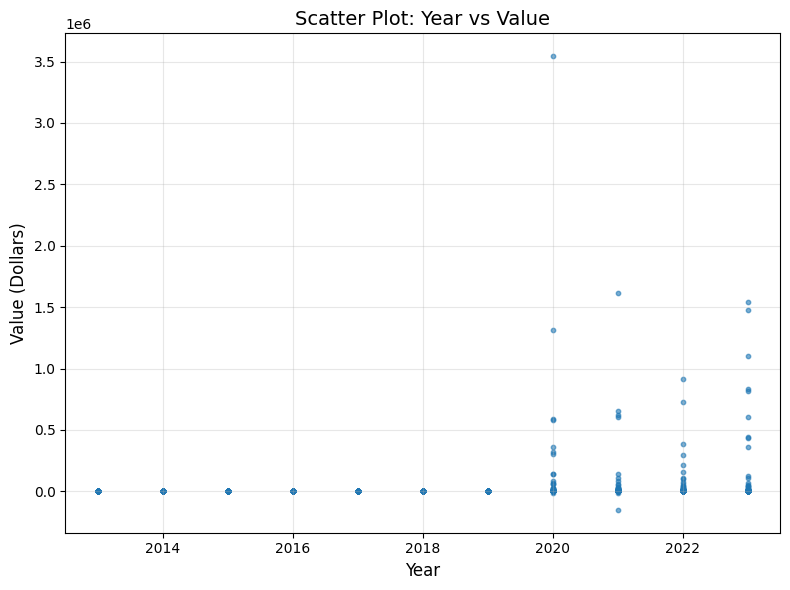

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'CodingCSV.csv'
df = pd.read_csv(file_path)

# Convert the 'Value' column to numeric, replacing non-numeric entries with NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows with NaN in 'Value' or other relevant columns
df_clean = df.dropna(subset=['Value'])

# Sample a subset of the data to reduce size for plotting
sampled_df = df_clean.sample(n=1000, random_state=42)

# Scatter plot: Year vs. Value
plt.figure(figsize=(8, 6))
plt.scatter(sampled_df['Year'], sampled_df['Value'], alpha=0.6, s=10)
plt.title('Scatter Plot: Year vs Value', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value (Dollars)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
